In [1]:
import numpy as np
import matplotlib.pyplot as plt

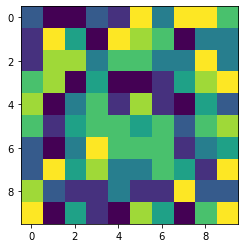

In [2]:
with open('../inputs/input11.txt', 'r') as f:
    strings = f.readlines()

start_grid = np.array([[int(val) for val in string.strip()] for string in strings])
plt.imshow(start_grid)

In [3]:
def progress_one(grid):
    grid += 1
    flashed = set()
    should_flash = [tuple(*pos) for pos in zip(np.argwhere(grid > 9))]
    count = 0
    while len(should_flash) > 0:
        count += 1
        for i, j in should_flash:
            flash_pos_i_min, flash_pos_i_max = max(i-1, 0), min(i+2, 10)
            flash_pos_j_min, flash_pos_j_max = max(j-1, 0), min(j+2, 10)
            grid[flash_pos_i_min:flash_pos_i_max, flash_pos_j_min:flash_pos_j_max] += 1

        flashed.update(should_flash)
        should_flash = [tuple(*pos) for pos in zip(np.argwhere(grid > 9)) if tuple(*pos) not in flashed]
    if len(flashed) > 0:
        grid[tuple(zip(*flashed))] = 0
    return grid, len(flashed)


In [5]:
grid = start_grid.copy()
count_flashes = 0
for i in range(100):
    grid, n_flash = progress_one(grid)
    count_flashes += n_flash
count_flashes

1705

In [6]:
# part 2

from itertools import count
grid = start_grid.copy()
count_flashes = 0
for i in count():
    grid, n_flash = progress_one(grid)
    count_flashes += n_flash
    if n_flash == 100:
        print(i + 1)
        break

265
